In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## req data
- 기존 24812419 건의 데이터에서  사용자 1000명만을 추출하여 883854 건으로 축소하는 sampling 하였다.
- 컬럼명을 한글로 변경하였다. 
- 데이터를 성별, 나이, 요일, 연월 등을 보기 편하게 전처리 하였다. 

In [8]:
df = pd.read_csv("sample.cvs")
df = df.drop(columns="Unnamed: 0")

In [9]:
df.sample(10)

,사용자,결제날짜,결제금액,결제업체,large_category,mid_category,성별,나이,요일,결제시간,월,연월
83264,2760,2021-08-23,330000,리틀팍스,학습/교육,학원,여성,36~39세,월,12~15시,8,2021-08
55266,1868,2022-02-14,2000,GS25,생활/마트,편의점,남성,28~31세,월,15~18시,2,2022-02
381072,11681,2022-02-27,10000,문구,생활/마트,일상용품,여성,28~31세,일,15~18시,2,2022-02
98270,3215,2022-05-06,21000,네이버페이,온라인쇼핑,결제/충전,여성,44~47세,금,6~9시,5,2022-05
538044,16576,2021-10-21,10000,빅세일마트,생활/마트,마트,여성,44~47세,목,18~21시,10,2021-10
39291,1306,2022-05-04,12000,스타벅스,카페/간식,커피,여성,23세이하,수,9~12시,5,2022-05
829801,25930,2021-11-05,5000,뷔페,식사,뷔페,남성,28~31세,금,12~15시,11,2021-11
344644,10404,2021-03-04,10000,파리크라상,카페/간식,커피,여성,24~27세,목,21~24시,3,2021-03
671771,21077,2021-07-10,32000,삼계탕,식사,한식,여성,24~27세,토,12~15시,7,2021-07
550294,16771,2022-06-16,28000,쿠팡,온라인쇼핑,인터넷쇼핑,남성,36~39세,목,15~18시,6,2022-06


# EDA

### large_category에 있는 데이터와 그 갯수

In [10]:
df["large_category"].value_counts()

생활/마트     228723
온라인쇼핑     163141
식사        142799
카페/간식      81723
교통/차량      79903
의료/건강      50892
백화점/패션     32791
주거/통신      26555
금융/보험      20209
문화/예술      17377
뷰티/미용       9922
학습/교육       9488
여행/숙박       7514
스포츠/레저      5721
술/유흥        4161
경조사/회비      2935
Name: large_category, dtype: int64

### 범주형데이터의 기술통계

In [12]:
df.describe(include="object")

,결제날짜,결제업체,large_category,mid_category,성별,나이,요일,결제시간,연월
count,883854,883854,883854,883854,883854,883854,883854,883854,883854
unique,546,11523,16,101,2,13,7,8,18
top,2021-07-12,쿠팡,생활/마트,인터넷쇼핑,여성,36~39세,금,12~15시,2021-05
freq,2121,49288,228723,107998,461874,144335,132276,193241,55374


### 요일별 결제 횟수

<AxesSubplot:xlabel='요일', ylabel='count'>

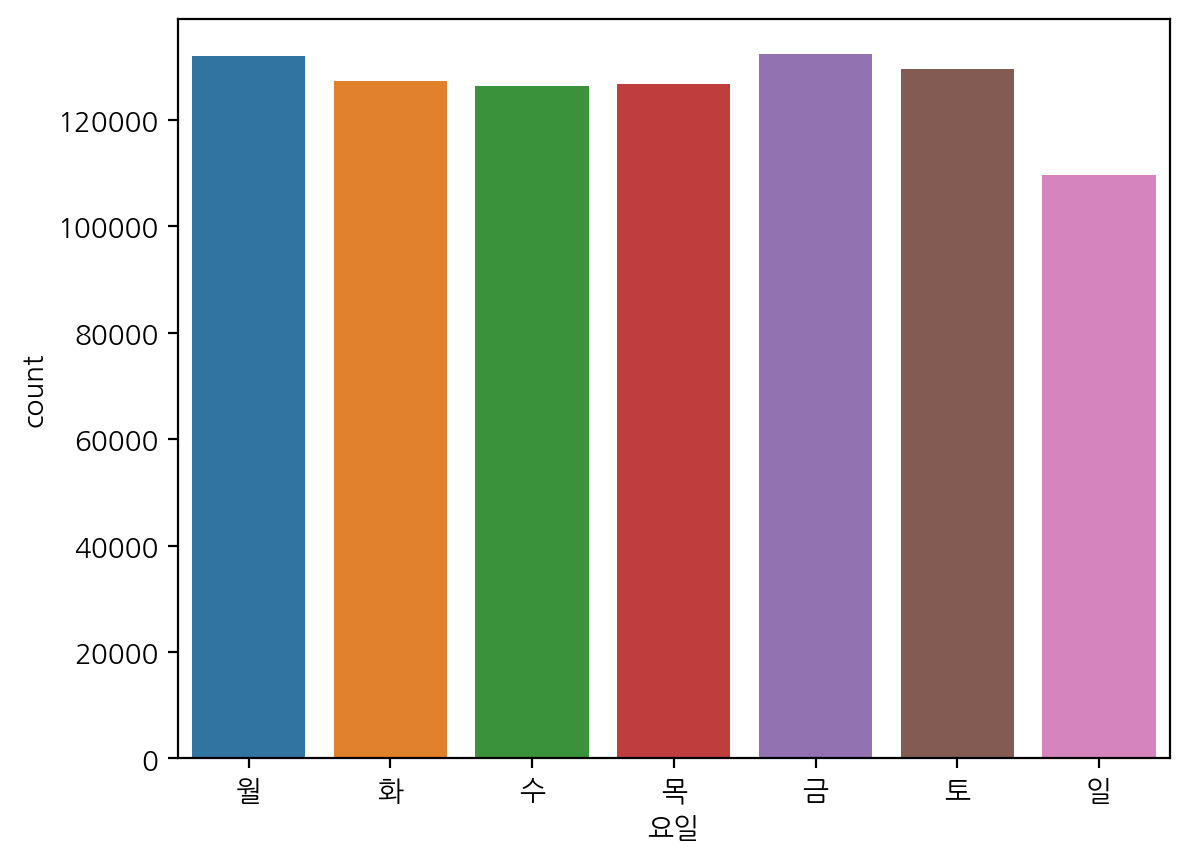

In [19]:
sns.countplot(data=df, x="요일", order=list("월화수목금토일"))

### 요일별결제횟수(성별)

<AxesSubplot:xlabel='요일', ylabel='count'>

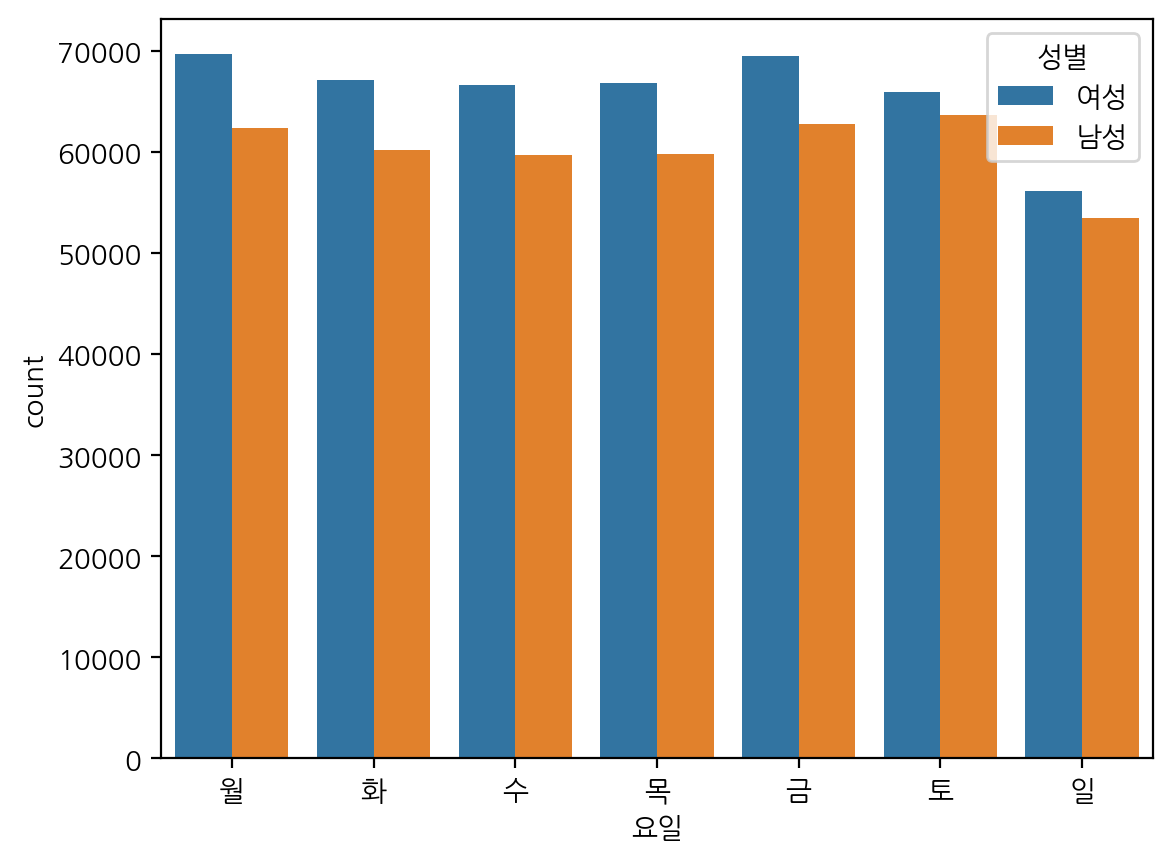

In [30]:
sns.countplot(data=df, x="요일", hue="성별", order=list("월화수목금토일"))

### 요일별 결제금액 평균

<AxesSubplot:xlabel='요일', ylabel='결제금액'>

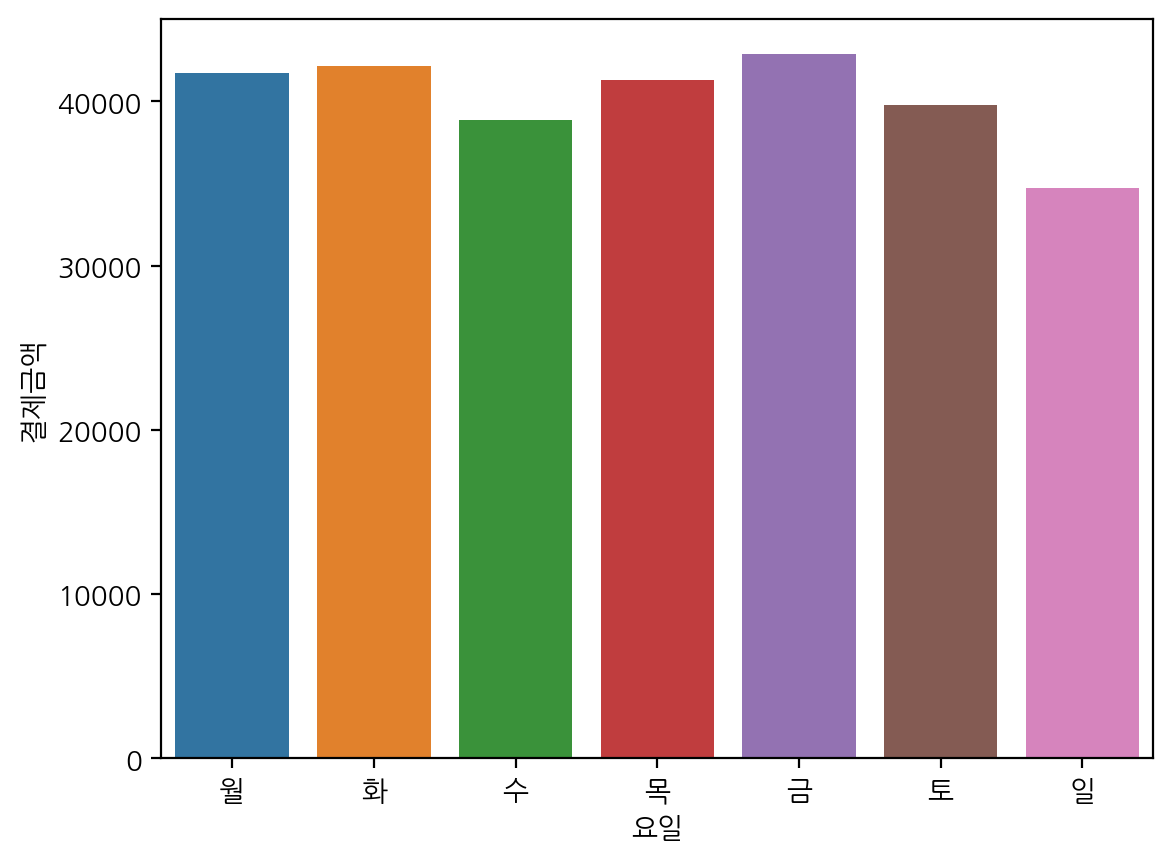

In [34]:
sns.barplot(data=df, x="요일", y="결제금액", ci=None, order=list("월화수목금토일"))

### 요일별 결제금액 평균(성별)

<AxesSubplot:xlabel='요일', ylabel='결제금액'>

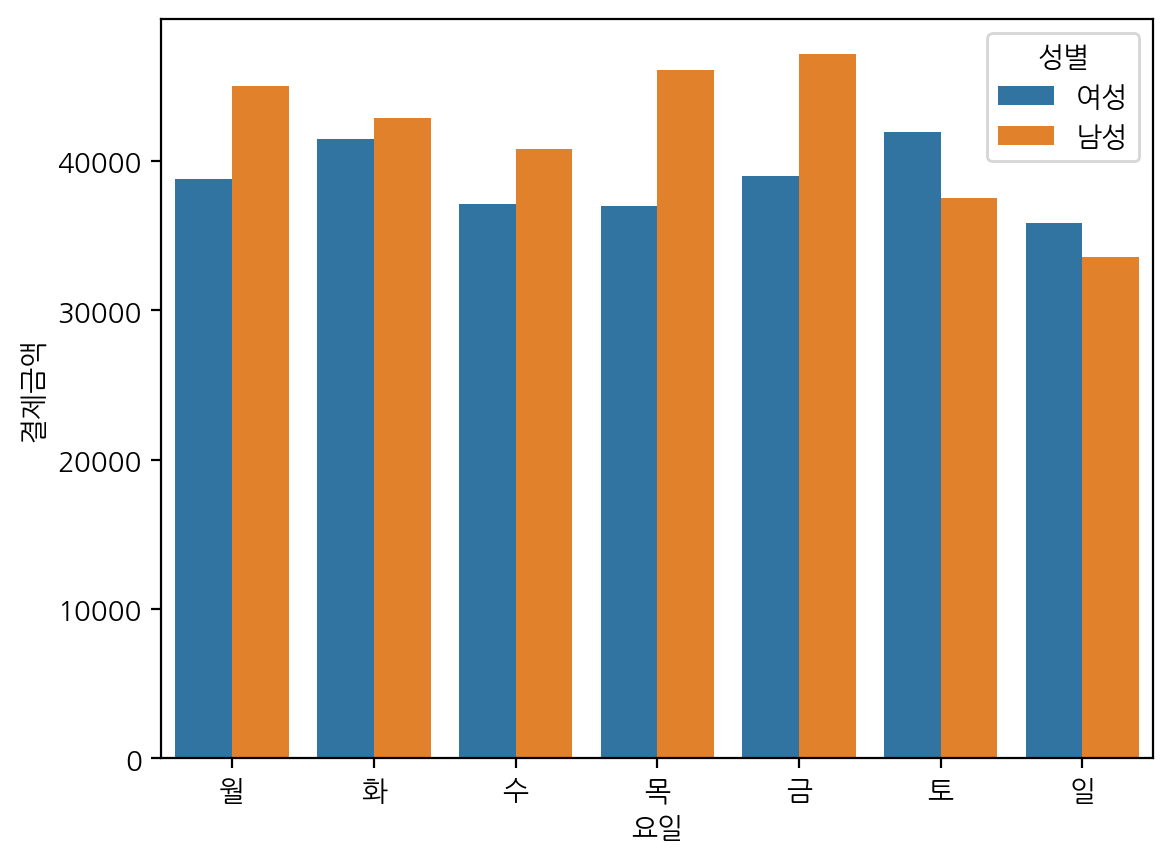

In [36]:
sns.barplot(data=df, x="요일", y="결제금액", hue="성별",ci=None, order=list("월화수목금토일"))

### 요일별 결제금액 총합

<AxesSubplot:xlabel='요일', ylabel='결제금액'>

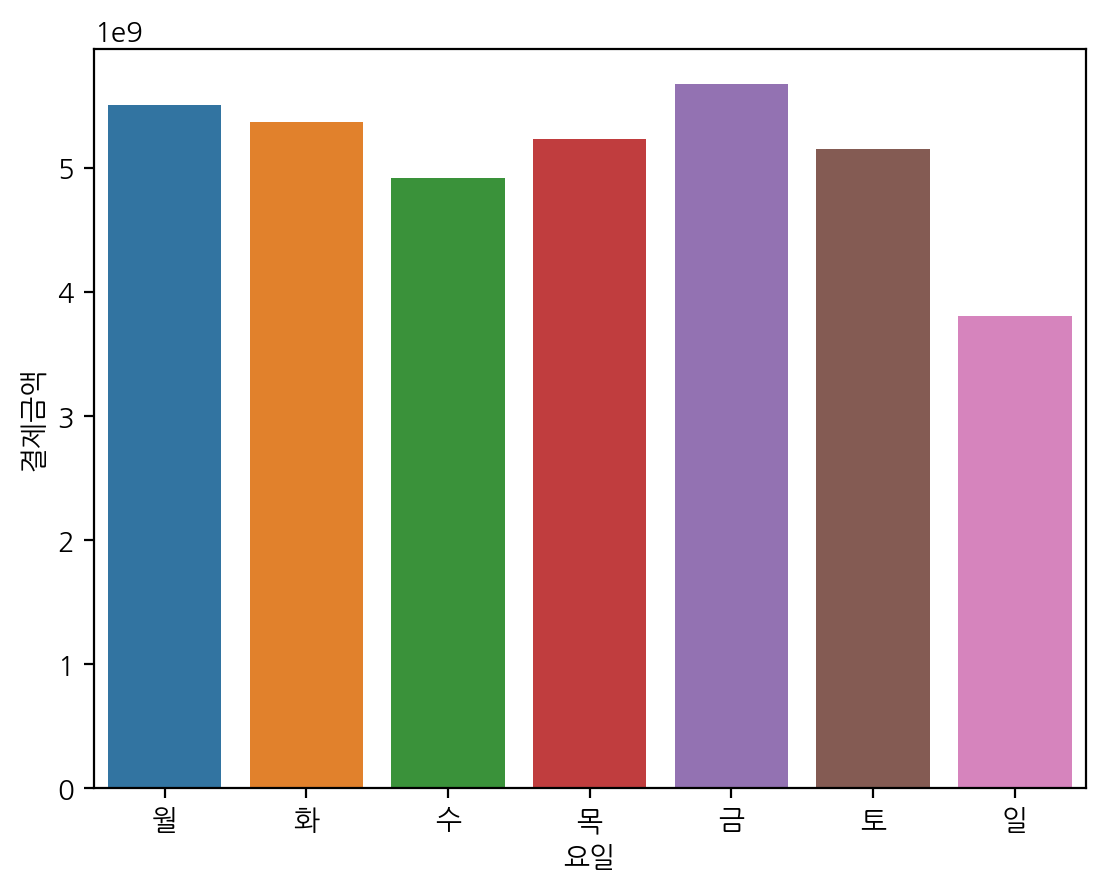

In [35]:
sns.barplot(data=df, x="요일", y="결제금액", ci=None, estimator=sum ,order=list("월화수목금토일"))

### 요일별 결제금액 총합 (성별)

<AxesSubplot:xlabel='요일', ylabel='결제금액'>

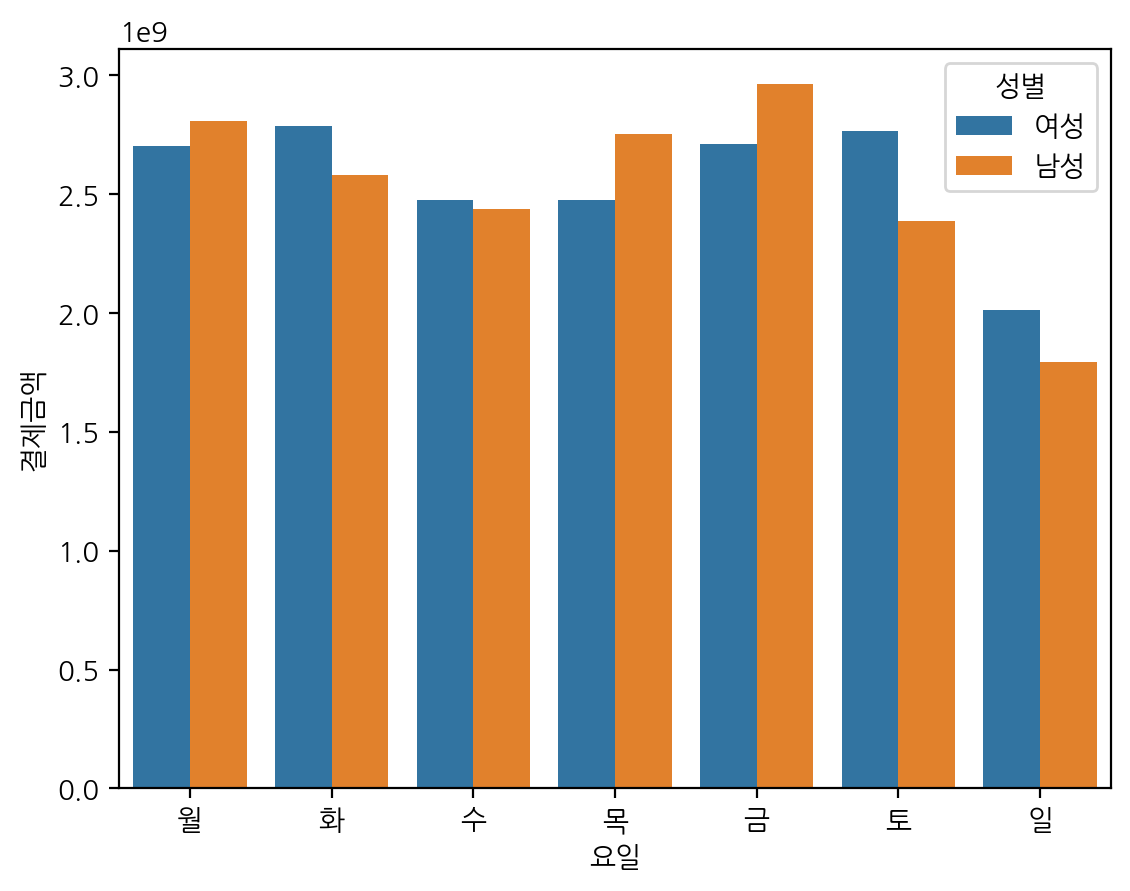

In [37]:
sns.barplot(data=df, x="요일", y="결제금액",hue="성별", ci=None, estimator=sum ,order=list("월화수목금토일"))

### 연월별 결제 횟수

<AxesSubplot:xlabel='연월', ylabel='count'>

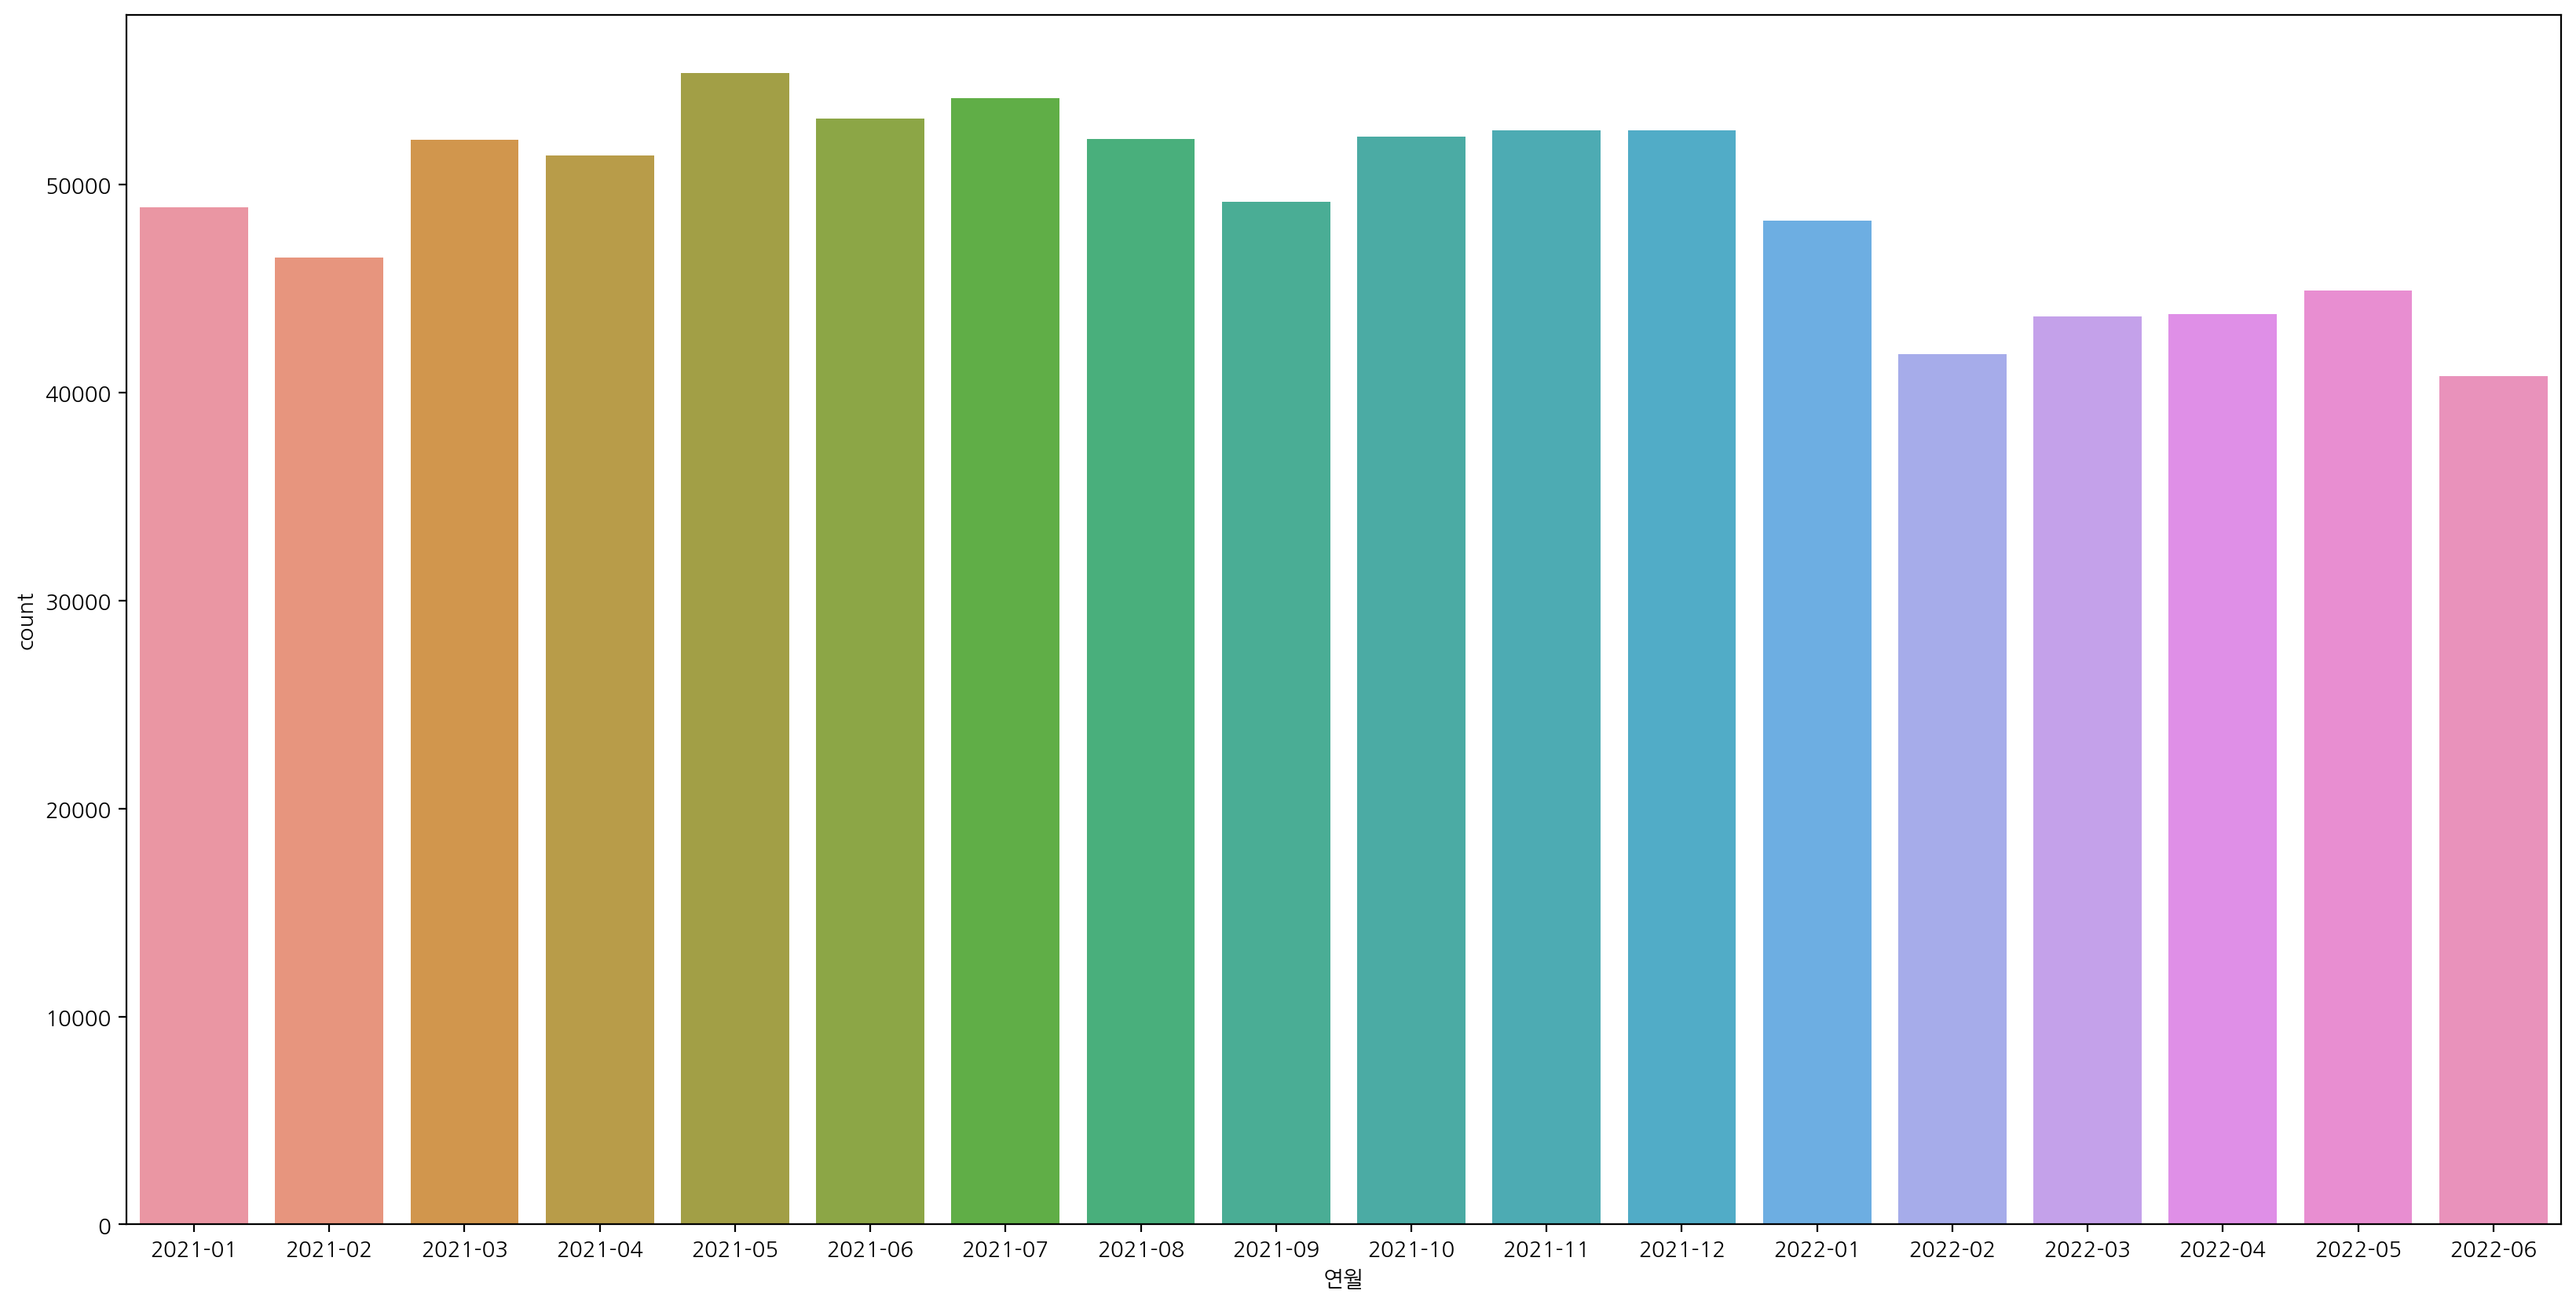

In [29]:
year_month = df["연월"].sort_values().drop_duplicates().values

plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="연월", order=year_month)

### 연월별결제횟수 (성별)

<AxesSubplot:xlabel='연월', ylabel='count'>

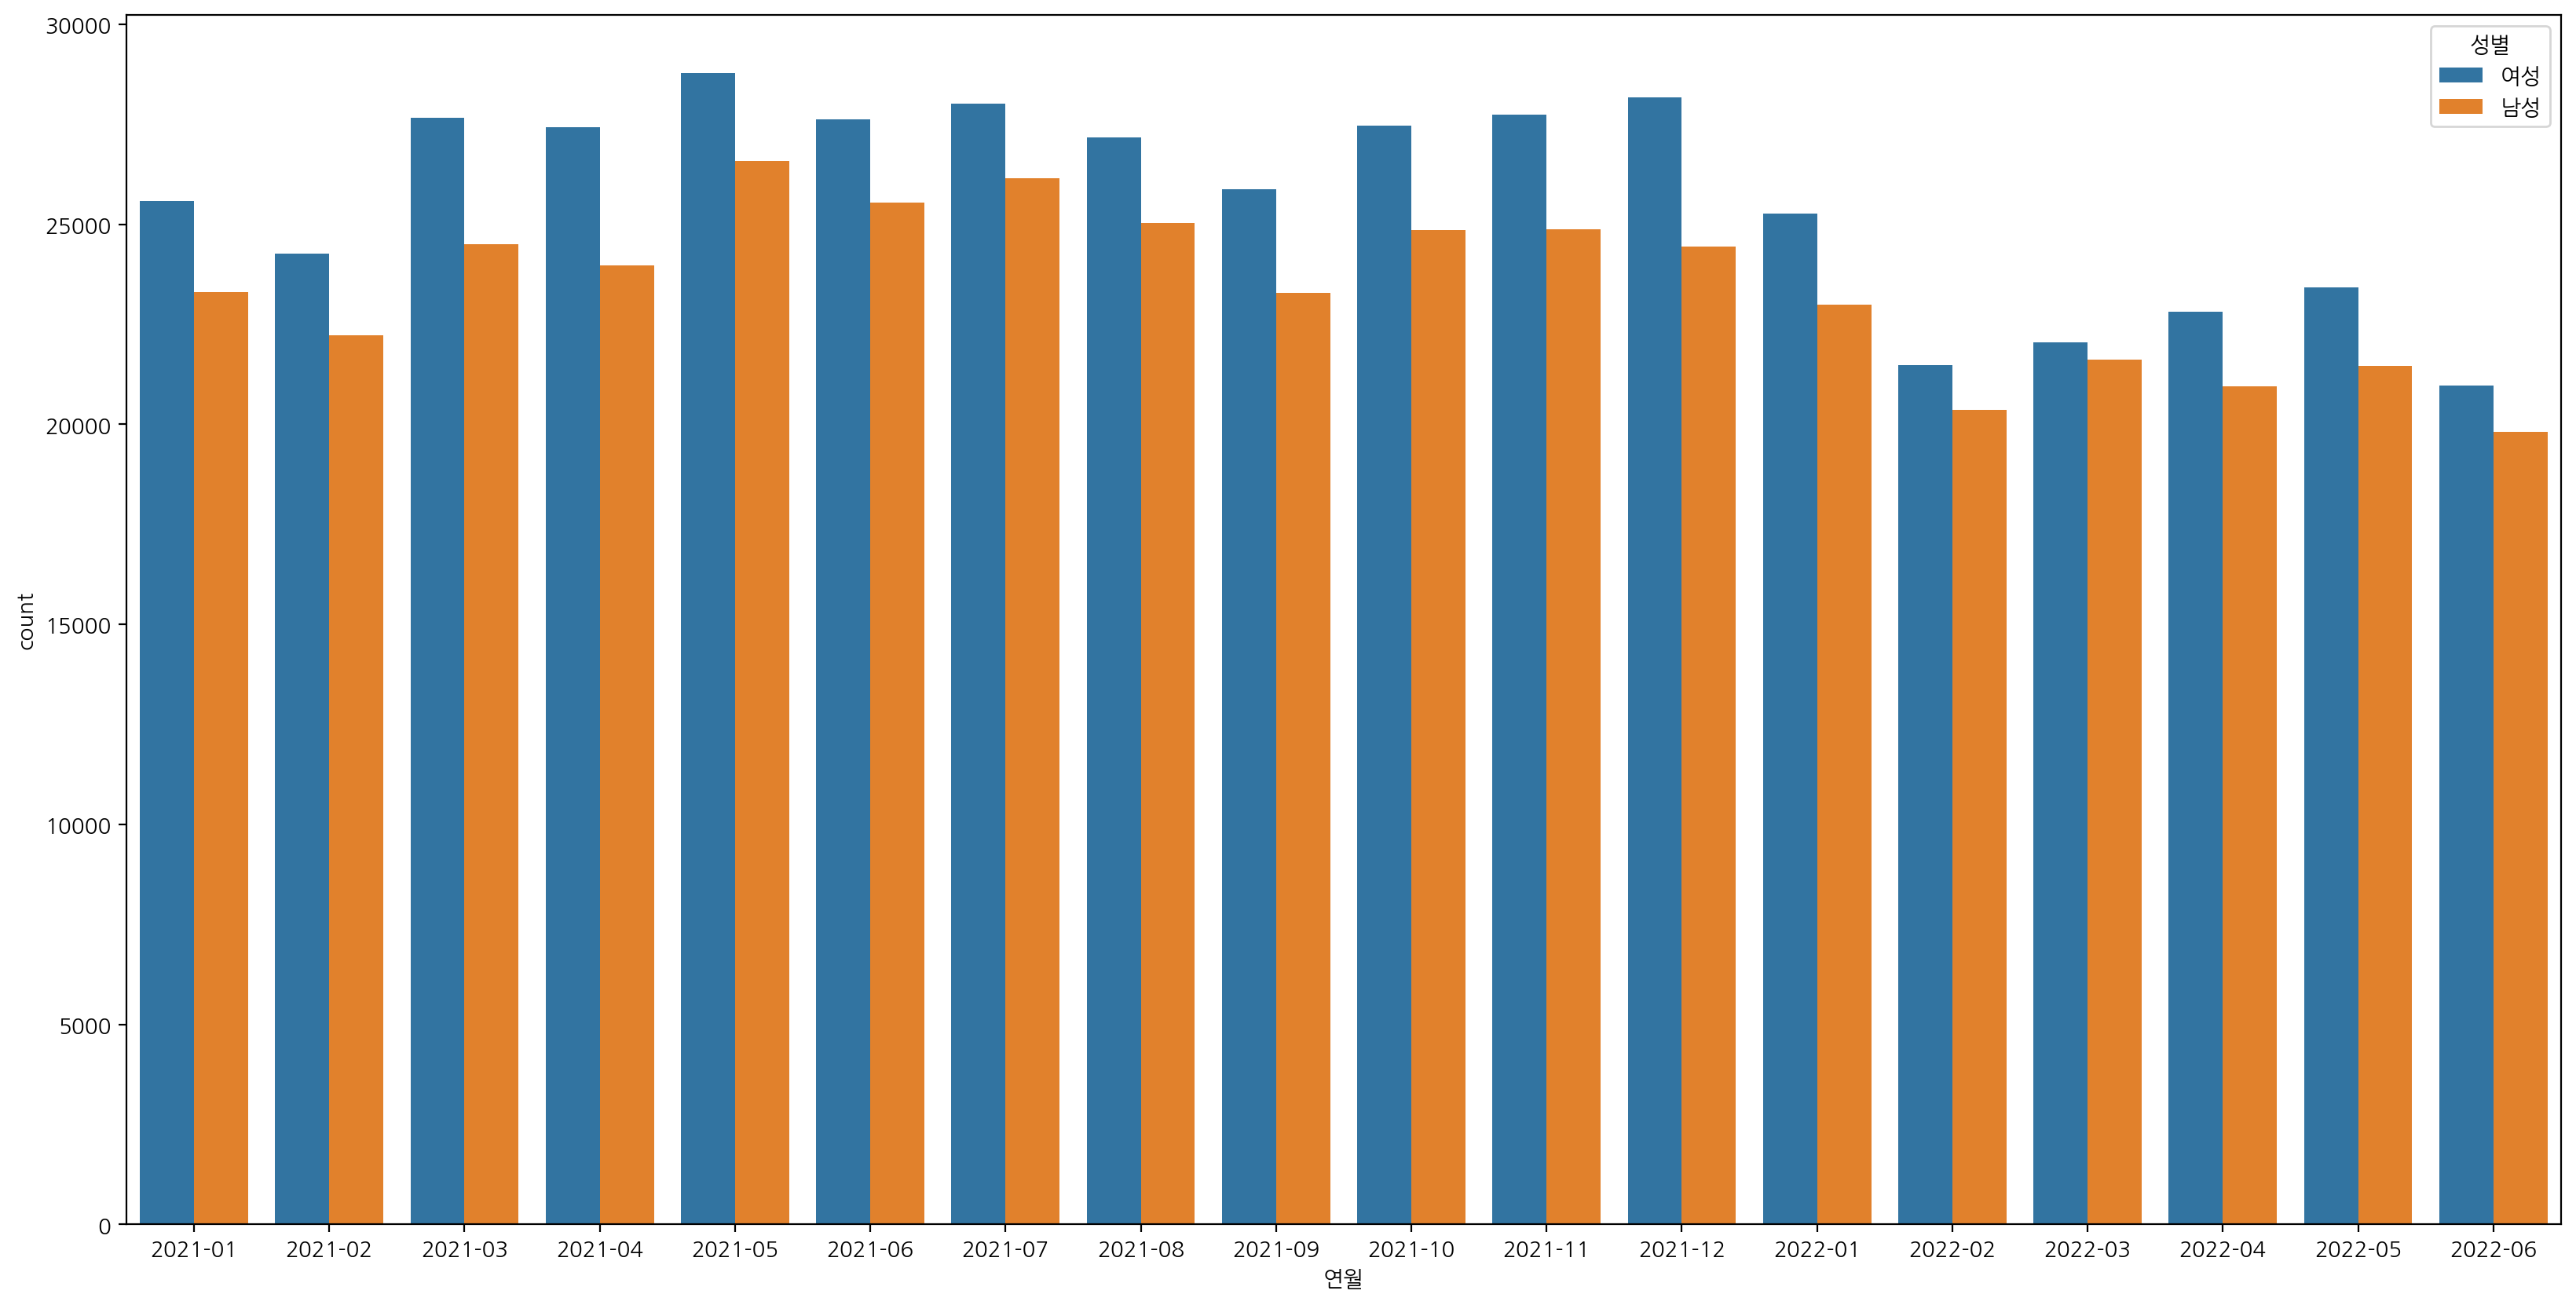

In [31]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="연월", hue="성별", order=year_month)

### 연월별 결제평균

<AxesSubplot:xlabel='연월', ylabel='결제금액'>

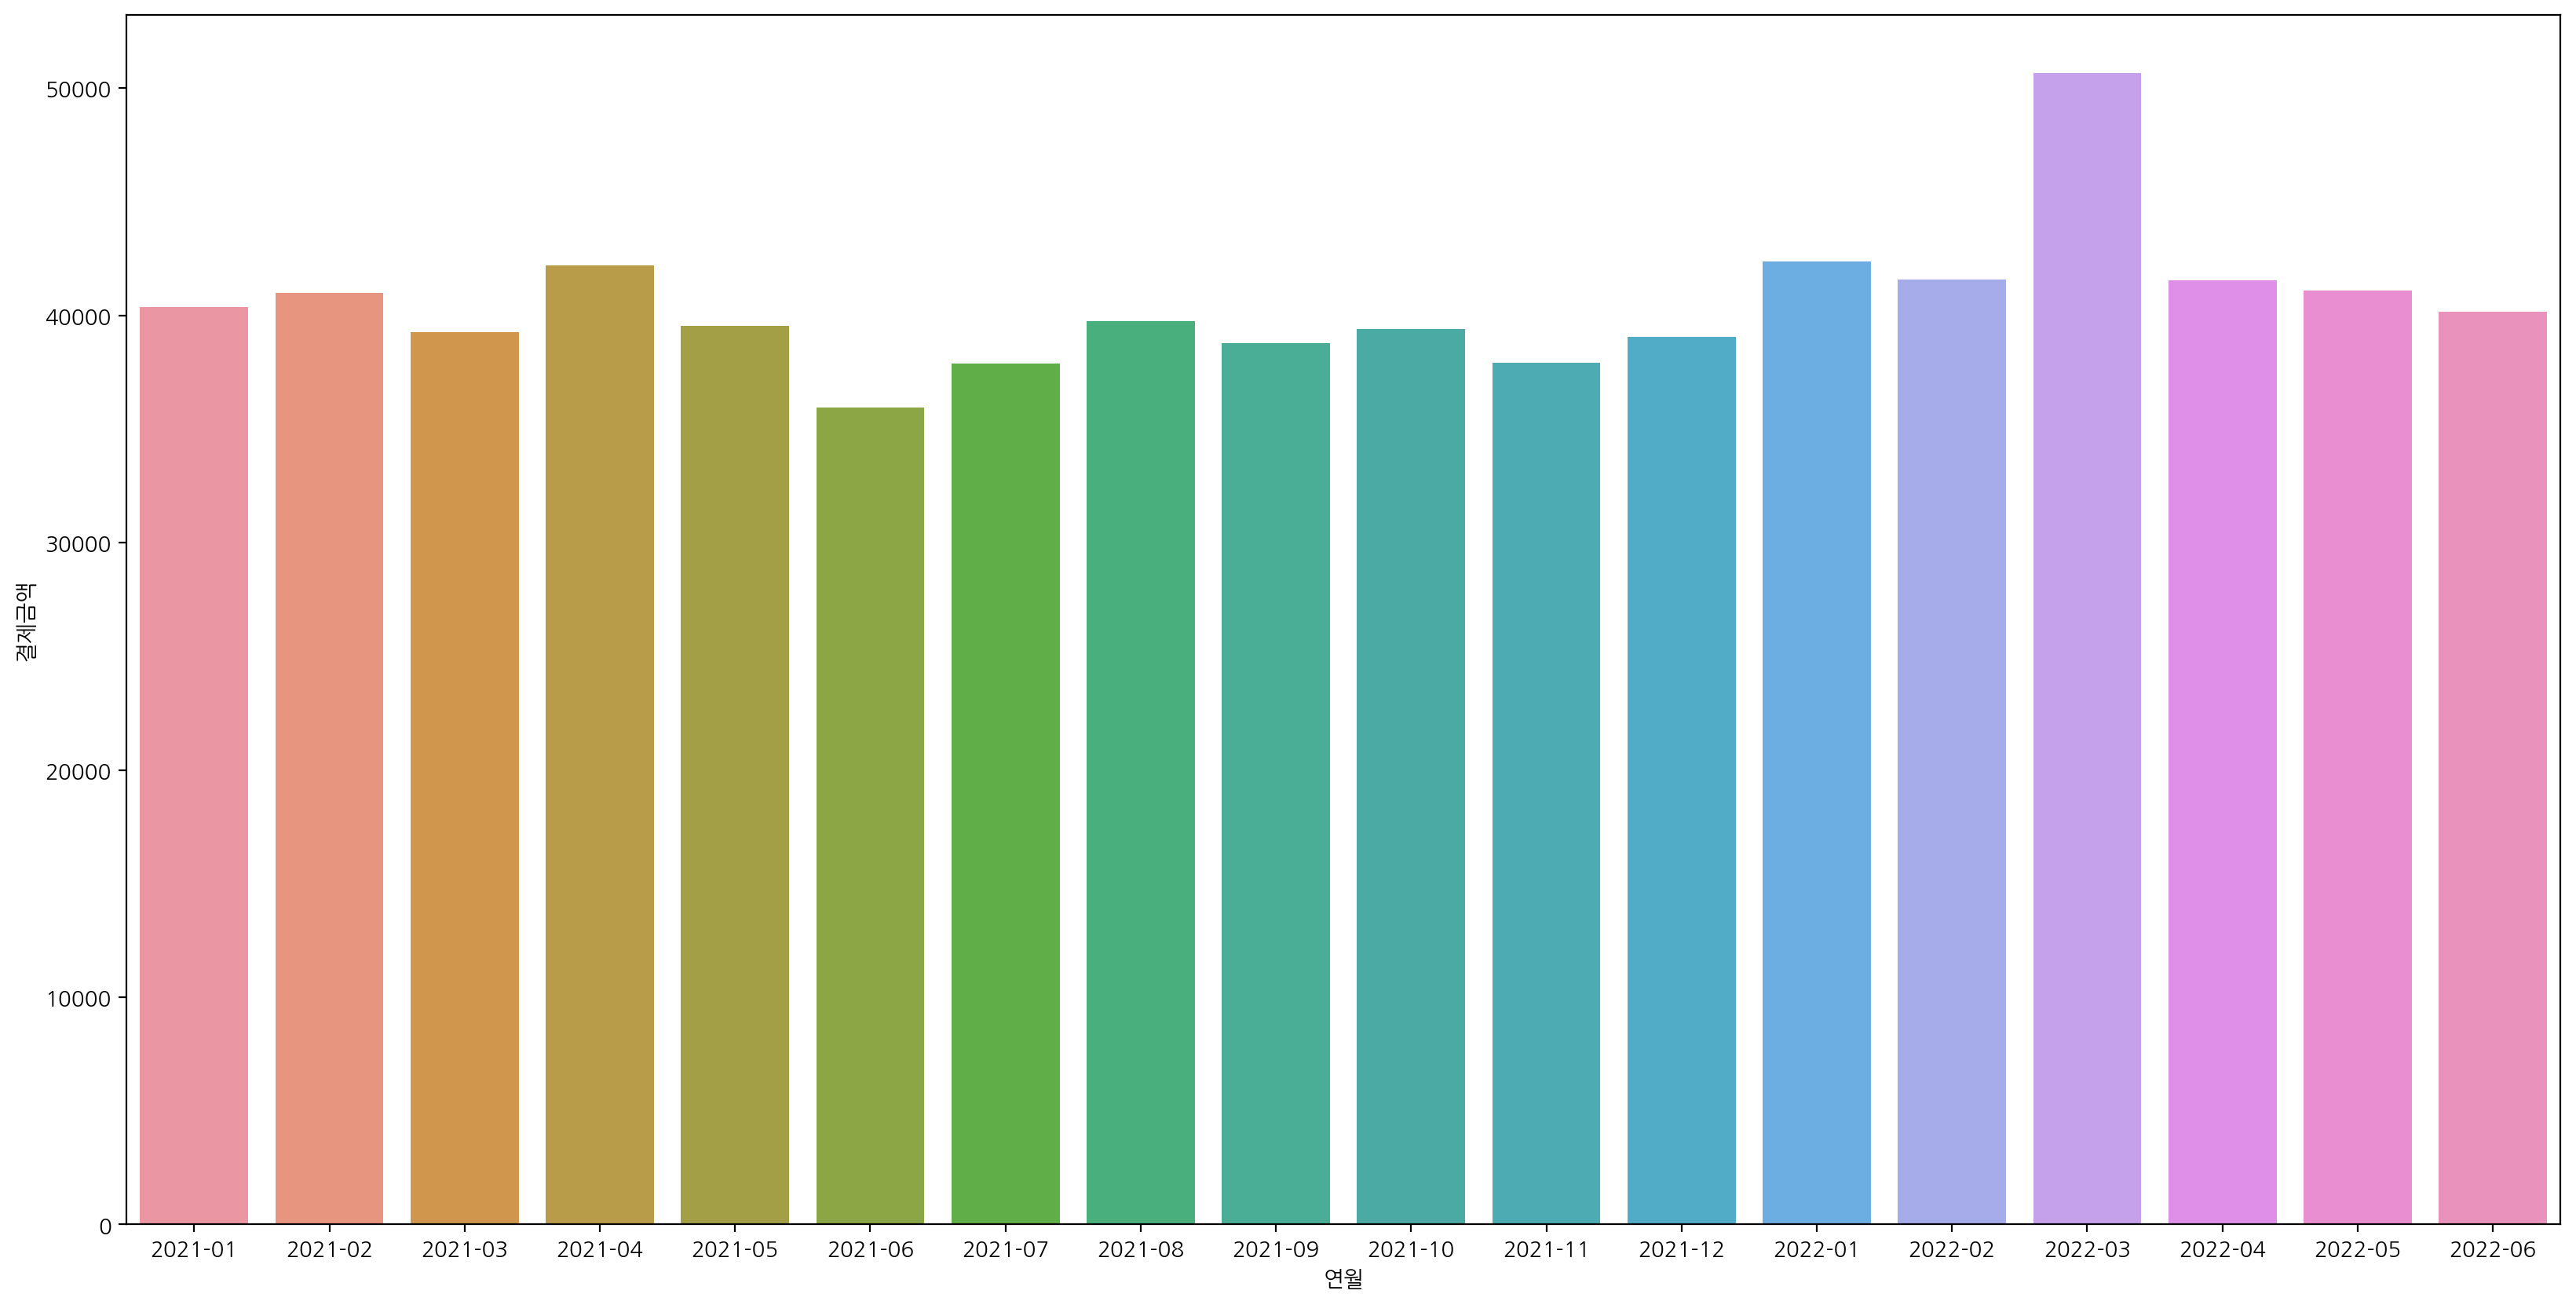

In [26]:
year_month = df["연월"].sort_values().drop_duplicates().values

plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="연월", y="결제금액", ci=None, order=year_month)

### 연월별결제평균(성별)

<AxesSubplot:xlabel='연월', ylabel='결제금액'>

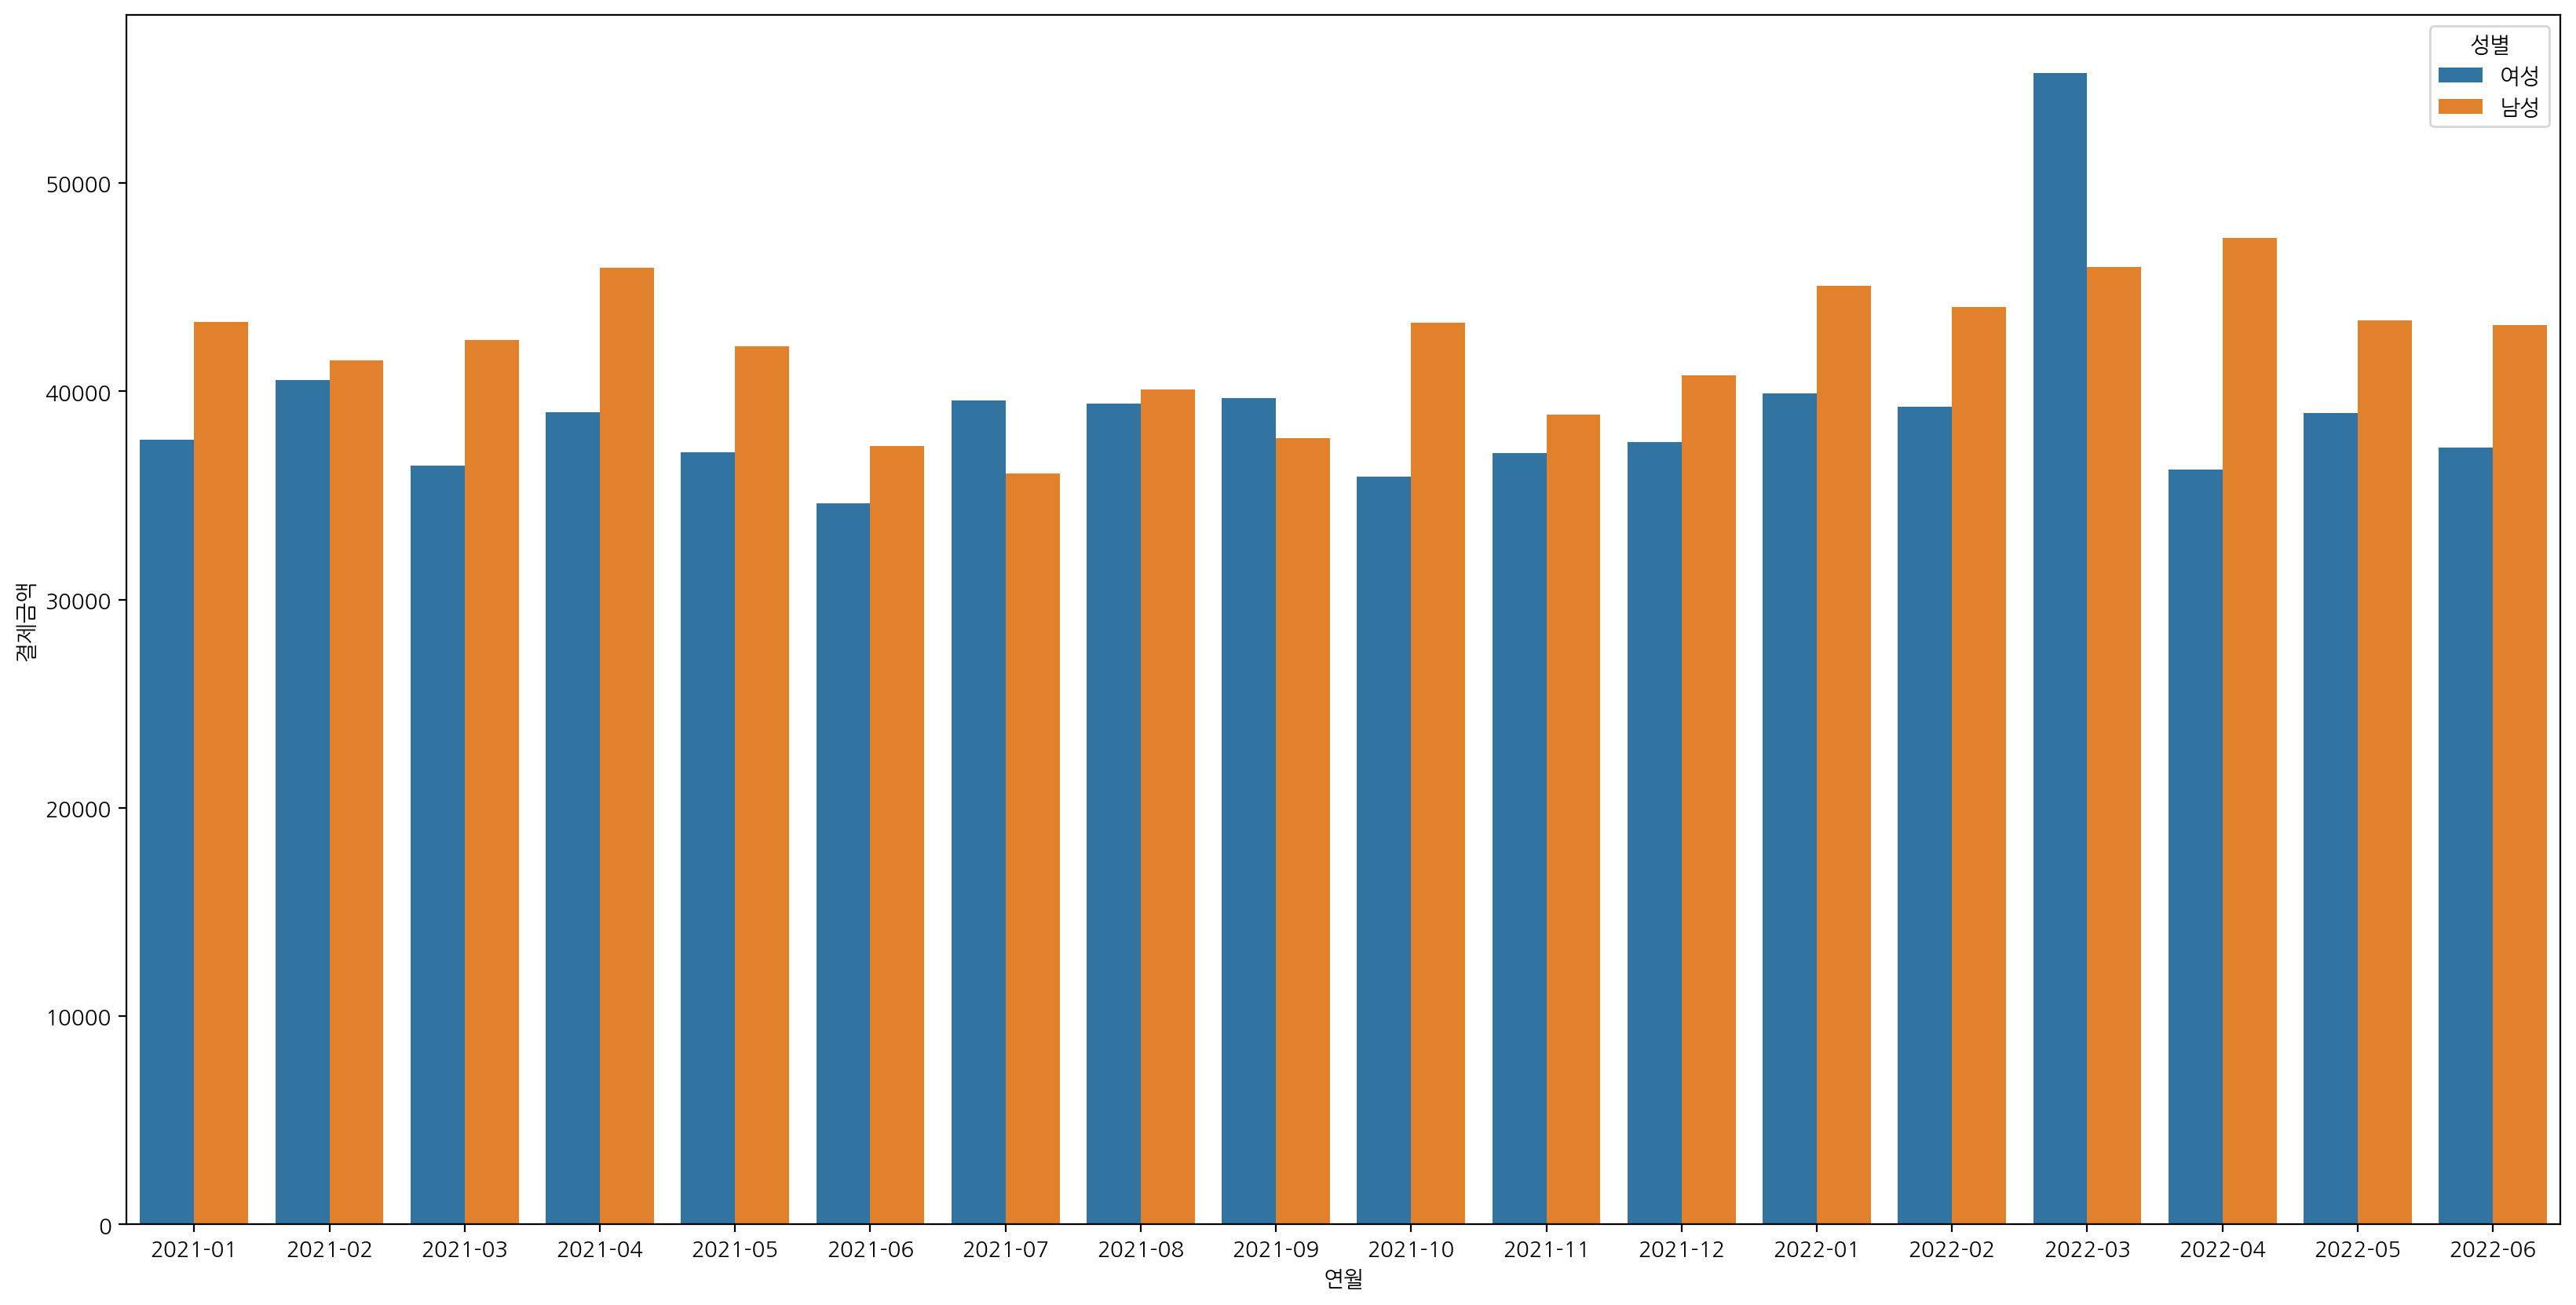

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="연월", y="결제금액",hue="성별", ci=None, order=year_month)

### 연월별 결제 총합

<AxesSubplot:xlabel='연월', ylabel='결제금액'>

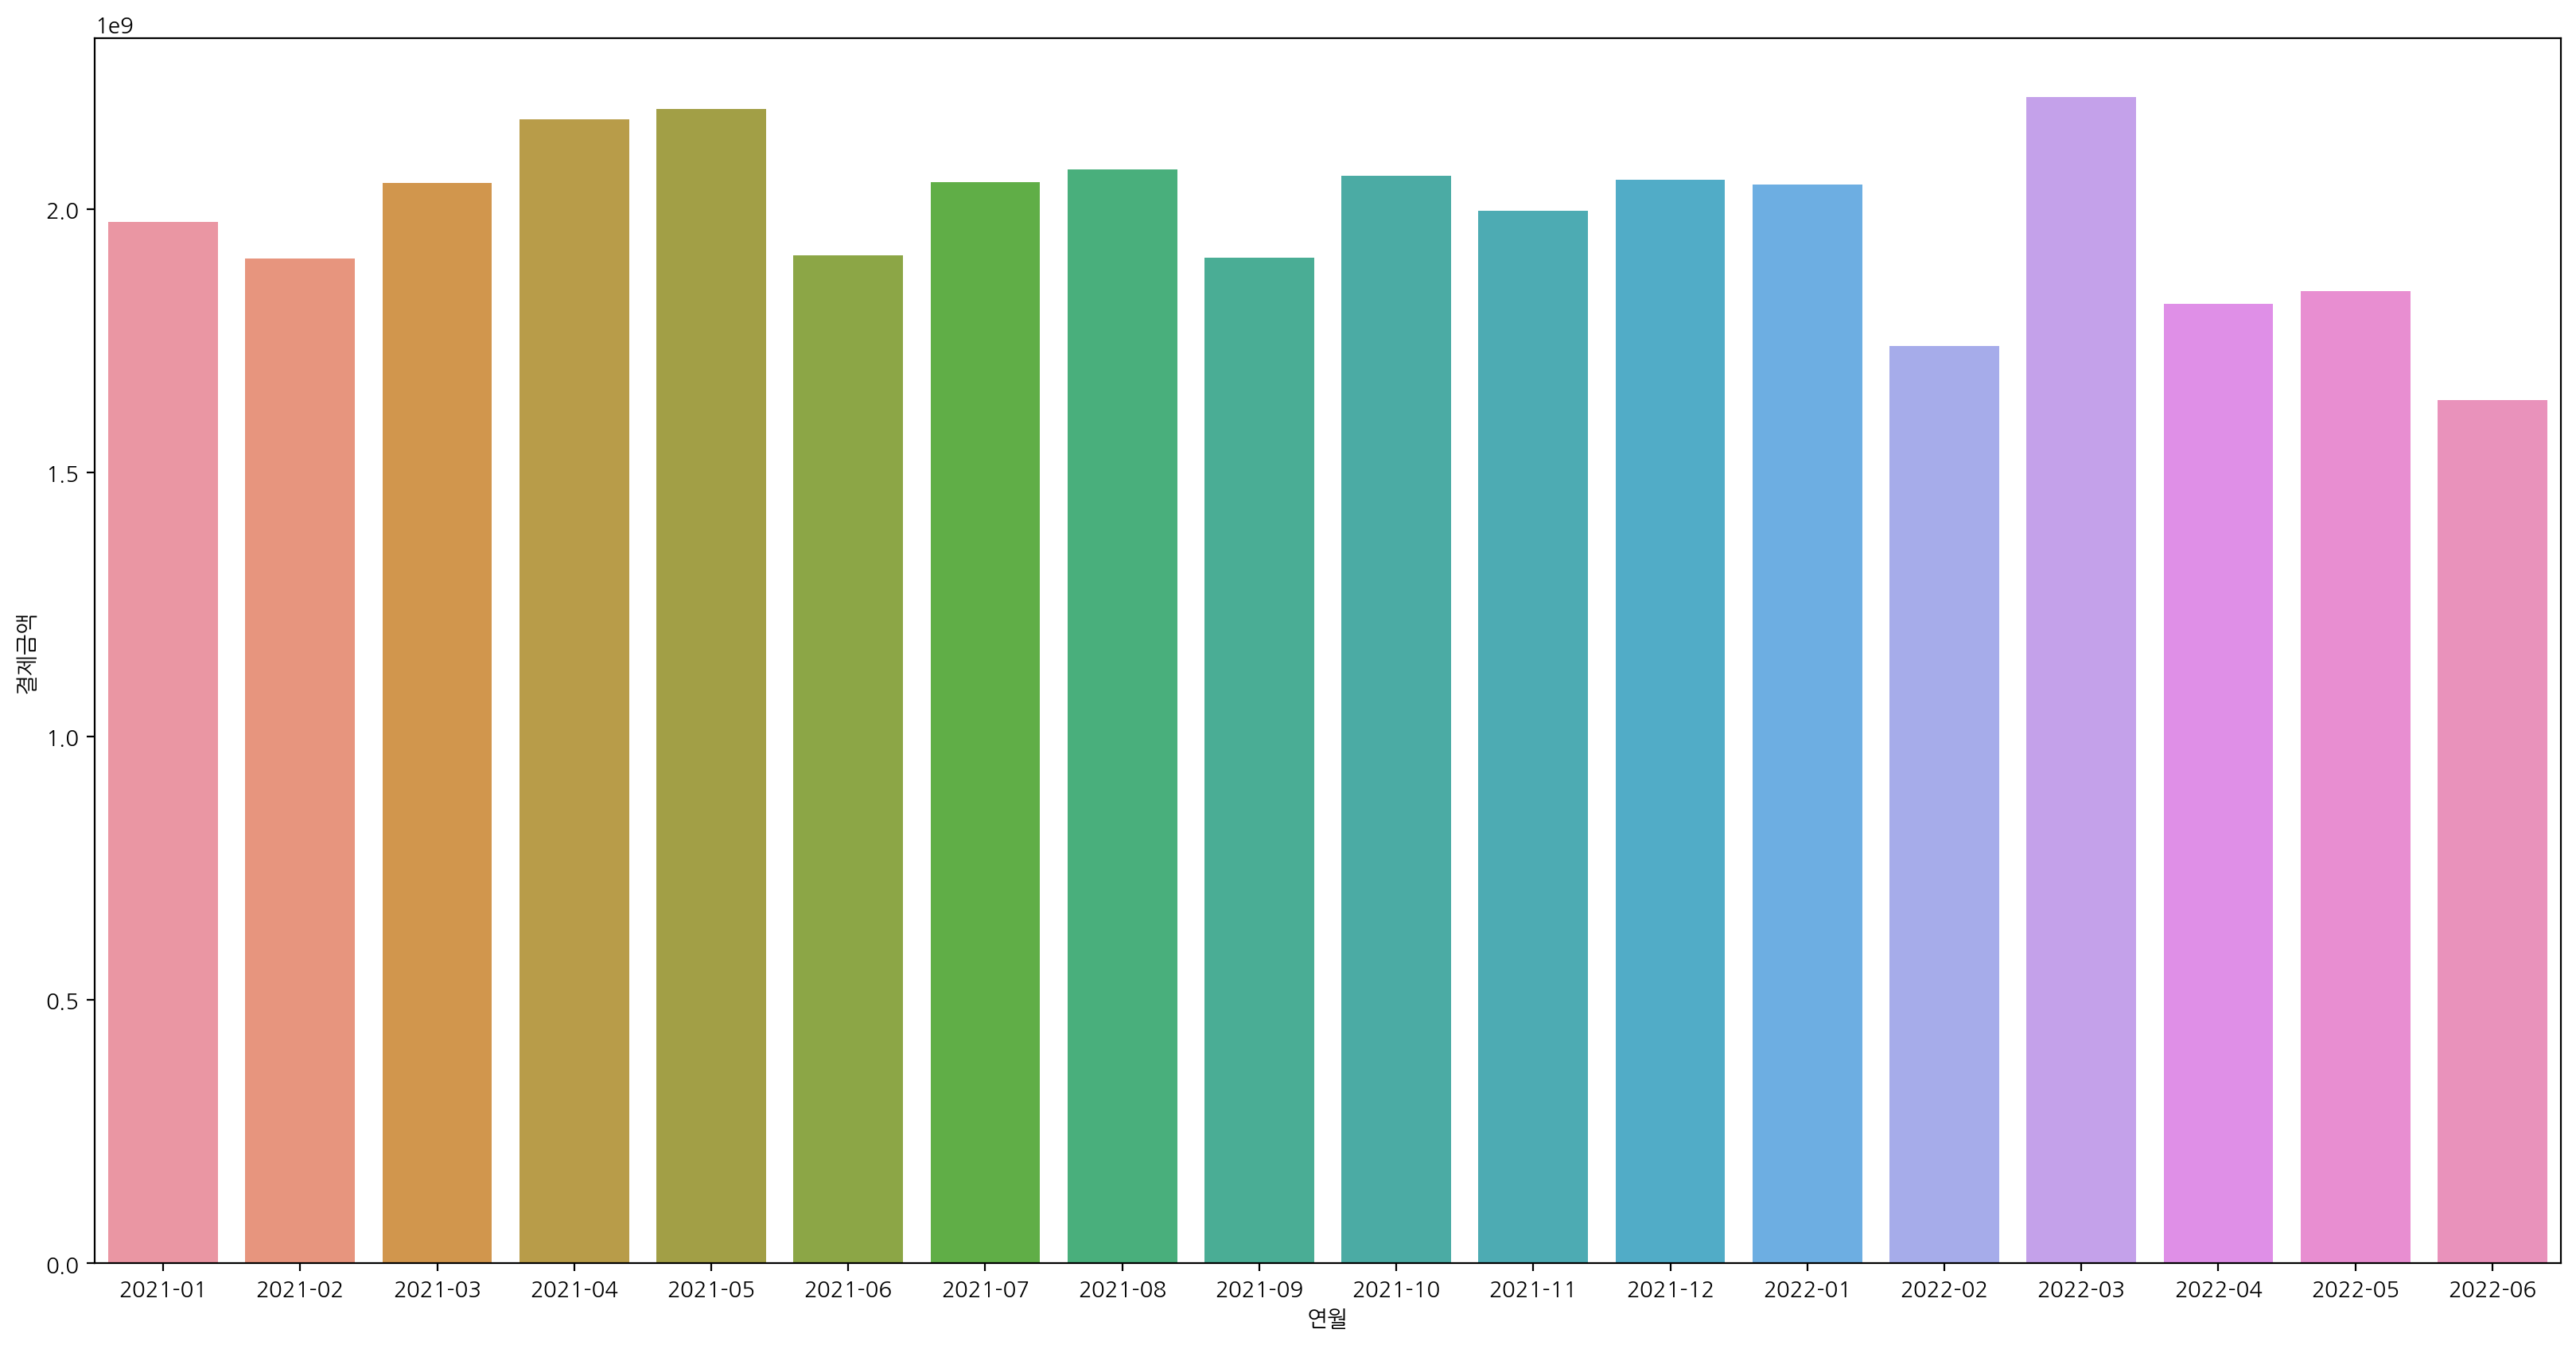

In [38]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="연월", y="결제금액", estimator=sum, ci=None, order=year_month)

### 연월별 결제 총합 (성별)

<AxesSubplot:xlabel='연월', ylabel='결제금액'>

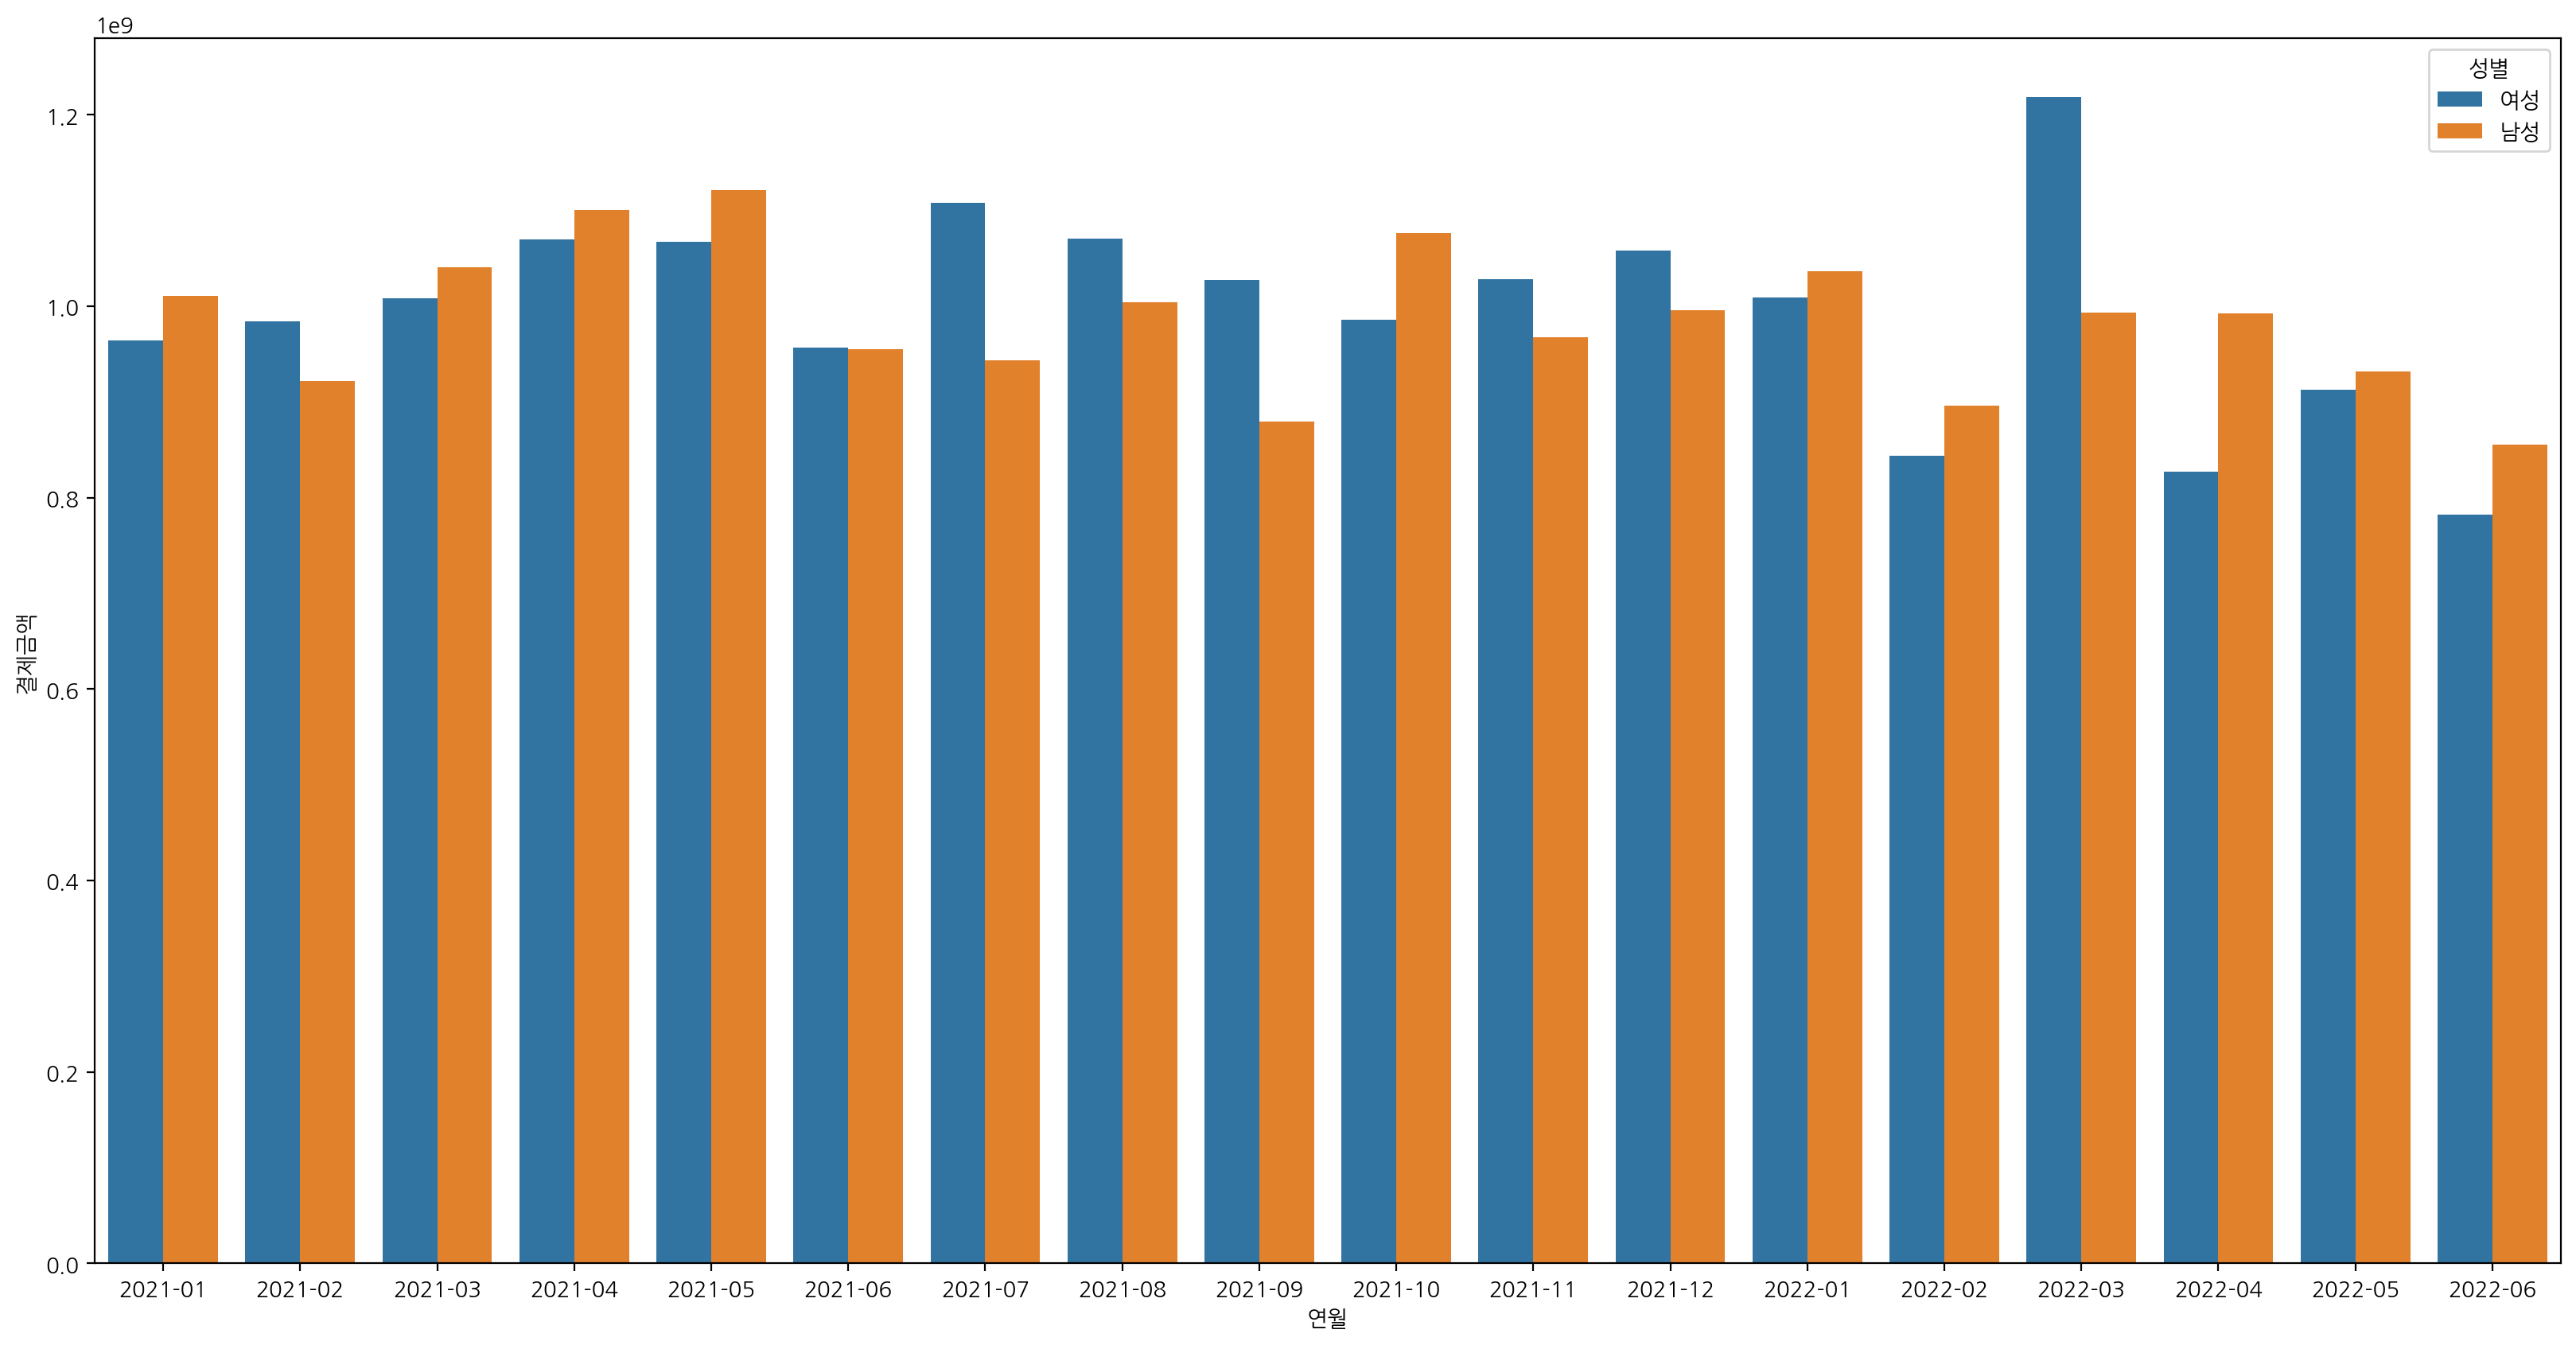

In [39]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="연월", y="결제금액",hue="성별", estimator=sum, ci=None, order=year_month)

### 요일별 배달추세

### 성별, 연령대별 배달추이

### 카테고리별 평균금액


### 사람별 구매 패턴

### 한 사람의 결제 금액당 식비가 차지하는 비율

### 취미활동 카테고리...를 EDA

### 날씨데이터랑 연동해서, 비오는날 소비추세